In [1]:
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
data_path = "C:/Users/hemeD/görüntü işleme/hafta_4/"
train_data = np.loadtxt(data_path + "mnist_train.csv", 
                        delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv", 
                       delimiter=",")

In [2]:
def my_pdf_1(x, mu=0.0, sigma=1.0):
    eps = np.finfo(float).eps
    x = float(x-mu)/(sigma + eps)
    return math.exp(-x*x/2.0)/math.sqrt(2.0*math.pi)/(sigma + eps)

In [3]:
def get_my_mean_and_std(k=0, l=0):
    s,t = 0,0
    for i in range(10000):
        if(test_data[i,0]==k):
            s = s+1
            t = t+test_data[i,l+1]
            
    mean_1 = t/s

    s,t = 0,0
    for i in range(10000):
        if(test_data[i,0]==k):
            s=s+1
            diff_1 = test_data[i,l+1]-mean_1
            t=t+diff_1*diff_1
    std_1=np.sqrt(t/(s-1))
        
    return mean_1, std_1

In [4]:
get_my_mean_and_std(1,10)
my_pdf_1(10,1,3)

0.001477282803979336

In [5]:
my_test_image1=plt.imread('resim.jpeg')
m,n,k=my_test_image1.shape

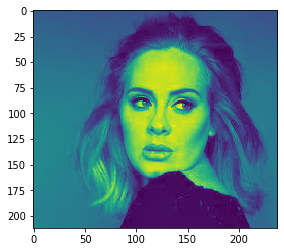

(2, (212, 238))

In [6]:
my_test_image=my_test_image1[:,:,0]
im_5=my_test_image.reshape(1, m*n)
plt.imshow(my_test_image)
plt.show()
my_test_image.ndim, my_test_image.shape

In [7]:
my_test_image[14,:]

array([81, 81, 80, 80, 80, 79, 79, 79, 80, 80, 79, 79, 79, 78, 78, 78, 79,
       79, 79, 79, 79, 79, 79, 79, 78, 77, 77, 77, 76, 76, 76, 75, 75, 75,
       75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 73, 73, 73,
       73, 73, 73, 73, 73, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72,
       72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72,
       72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 60, 50, 65, 50, 62, 47,
       62, 52, 54, 44, 31, 23, 23, 23, 20, 17, 22, 23, 23, 21, 18, 16, 16,
       15, 14, 12,  9,  8,  8, 10, 13, 14, 15, 15, 15, 15, 15, 14, 14, 14,
       10, 11, 12, 14, 16, 17, 17, 18, 13, 13, 13, 12, 12, 11, 11, 11, 14,
       14, 14, 11,  9, 11, 17, 23, 43, 49, 58, 68, 74, 76, 75, 73, 65, 66,
       68, 70, 72, 74, 76, 77, 79, 79, 79, 80, 80, 80, 81, 81, 82, 82, 82,
       81, 81, 80, 80, 80, 78, 78, 77, 77, 76, 76, 76, 76, 74, 74, 74, 74,
       73, 73, 73, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72,
       72, 72, 72, 69, 69

In [8]:
my_list=[]
for i in range(10):
    pdf_t=0
    for j in range(784):
        x=im_5[0,j]
        m_1,std_1=get_my_mean_and_std(i,j)
        pdf_deger=my_pdf_1(x, m_1, std_1)
        pdf_t = pdf_t + pdf_deger
    print(pdf_t)
    my_list.append(pdf_t)

1.321229679317196
0.7764971543574174
1.5278033078156399
1.4268992606585362
1.445490390006157
1.4838246016865162
1.329059035695396
1.3140861273684359
1.3303166540752385
1.2412392915457486


In [9]:
max(my_list)

1.5278033078156399